In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
data=pd.read_csv('titanic-passengers.csv',sep=";")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [6]:
data.dtypes

PassengerId      int64
Survived        object
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<Axes: ylabel='count'>

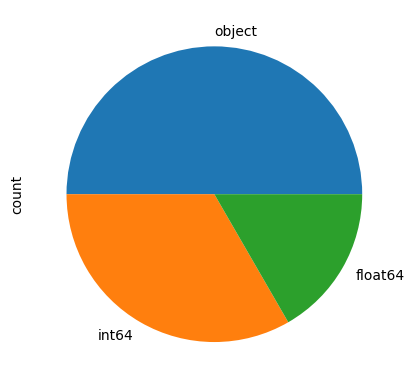

In [7]:
data.dtypes.value_counts().plot.pie()

In [8]:
data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

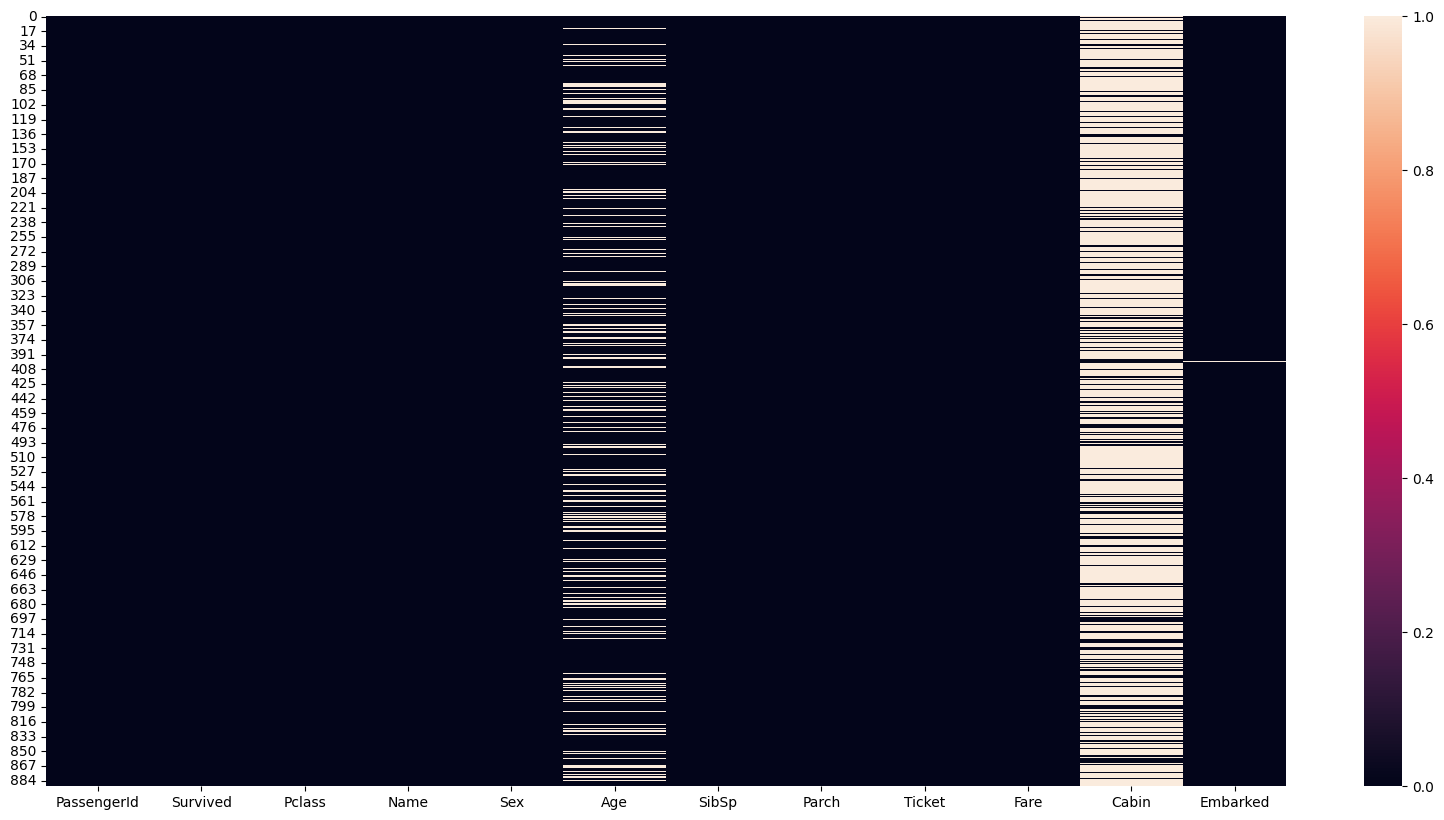

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(),cbar=True)


In [11]:

# Remplacer les valeurs manquantes dans la colonne 'Age' par la moyenne
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [12]:
data['Cabin'] = data['Cabin'].fillna('G6')

In [13]:
# 2. Encoder la colonne 'Sex' avec des valeurs numériques : 1 pour 'male', 0 pour 'female'
from sklearn.calibration import LabelEncoder


label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Survived'] = label_encoder.fit_transform(data['Survived'])

In [14]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,G6,C
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,G6,C
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,G6,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,G6,S


In [15]:
#  X (features)
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']]

# variable y
y = data['Survived']


In [16]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Afficher la taille des ensembles pour vérifier
print("Taille de l'ensemble d'entraînement (X_train, y_train) :", X_train.shape, y_train.shape)
print("Taille de l'ensemble de test (X_test, y_test) :", X_test.shape, y_test.shape)


Taille de l'ensemble d'entraînement (X_train, y_train) : (712, 7) (712,)
Taille de l'ensemble de test (X_test, y_test) : (179, 7) (179,)


In [17]:

from sklearn.tree import DecisionTreeClassifier
# Créaction  un modèle d'arbre de décision initial sans paramètres (paramètres par défaut)
model_dt = DecisionTreeClassifier()

# Entraîner le modèle sur l'ensemble d'entraînement
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

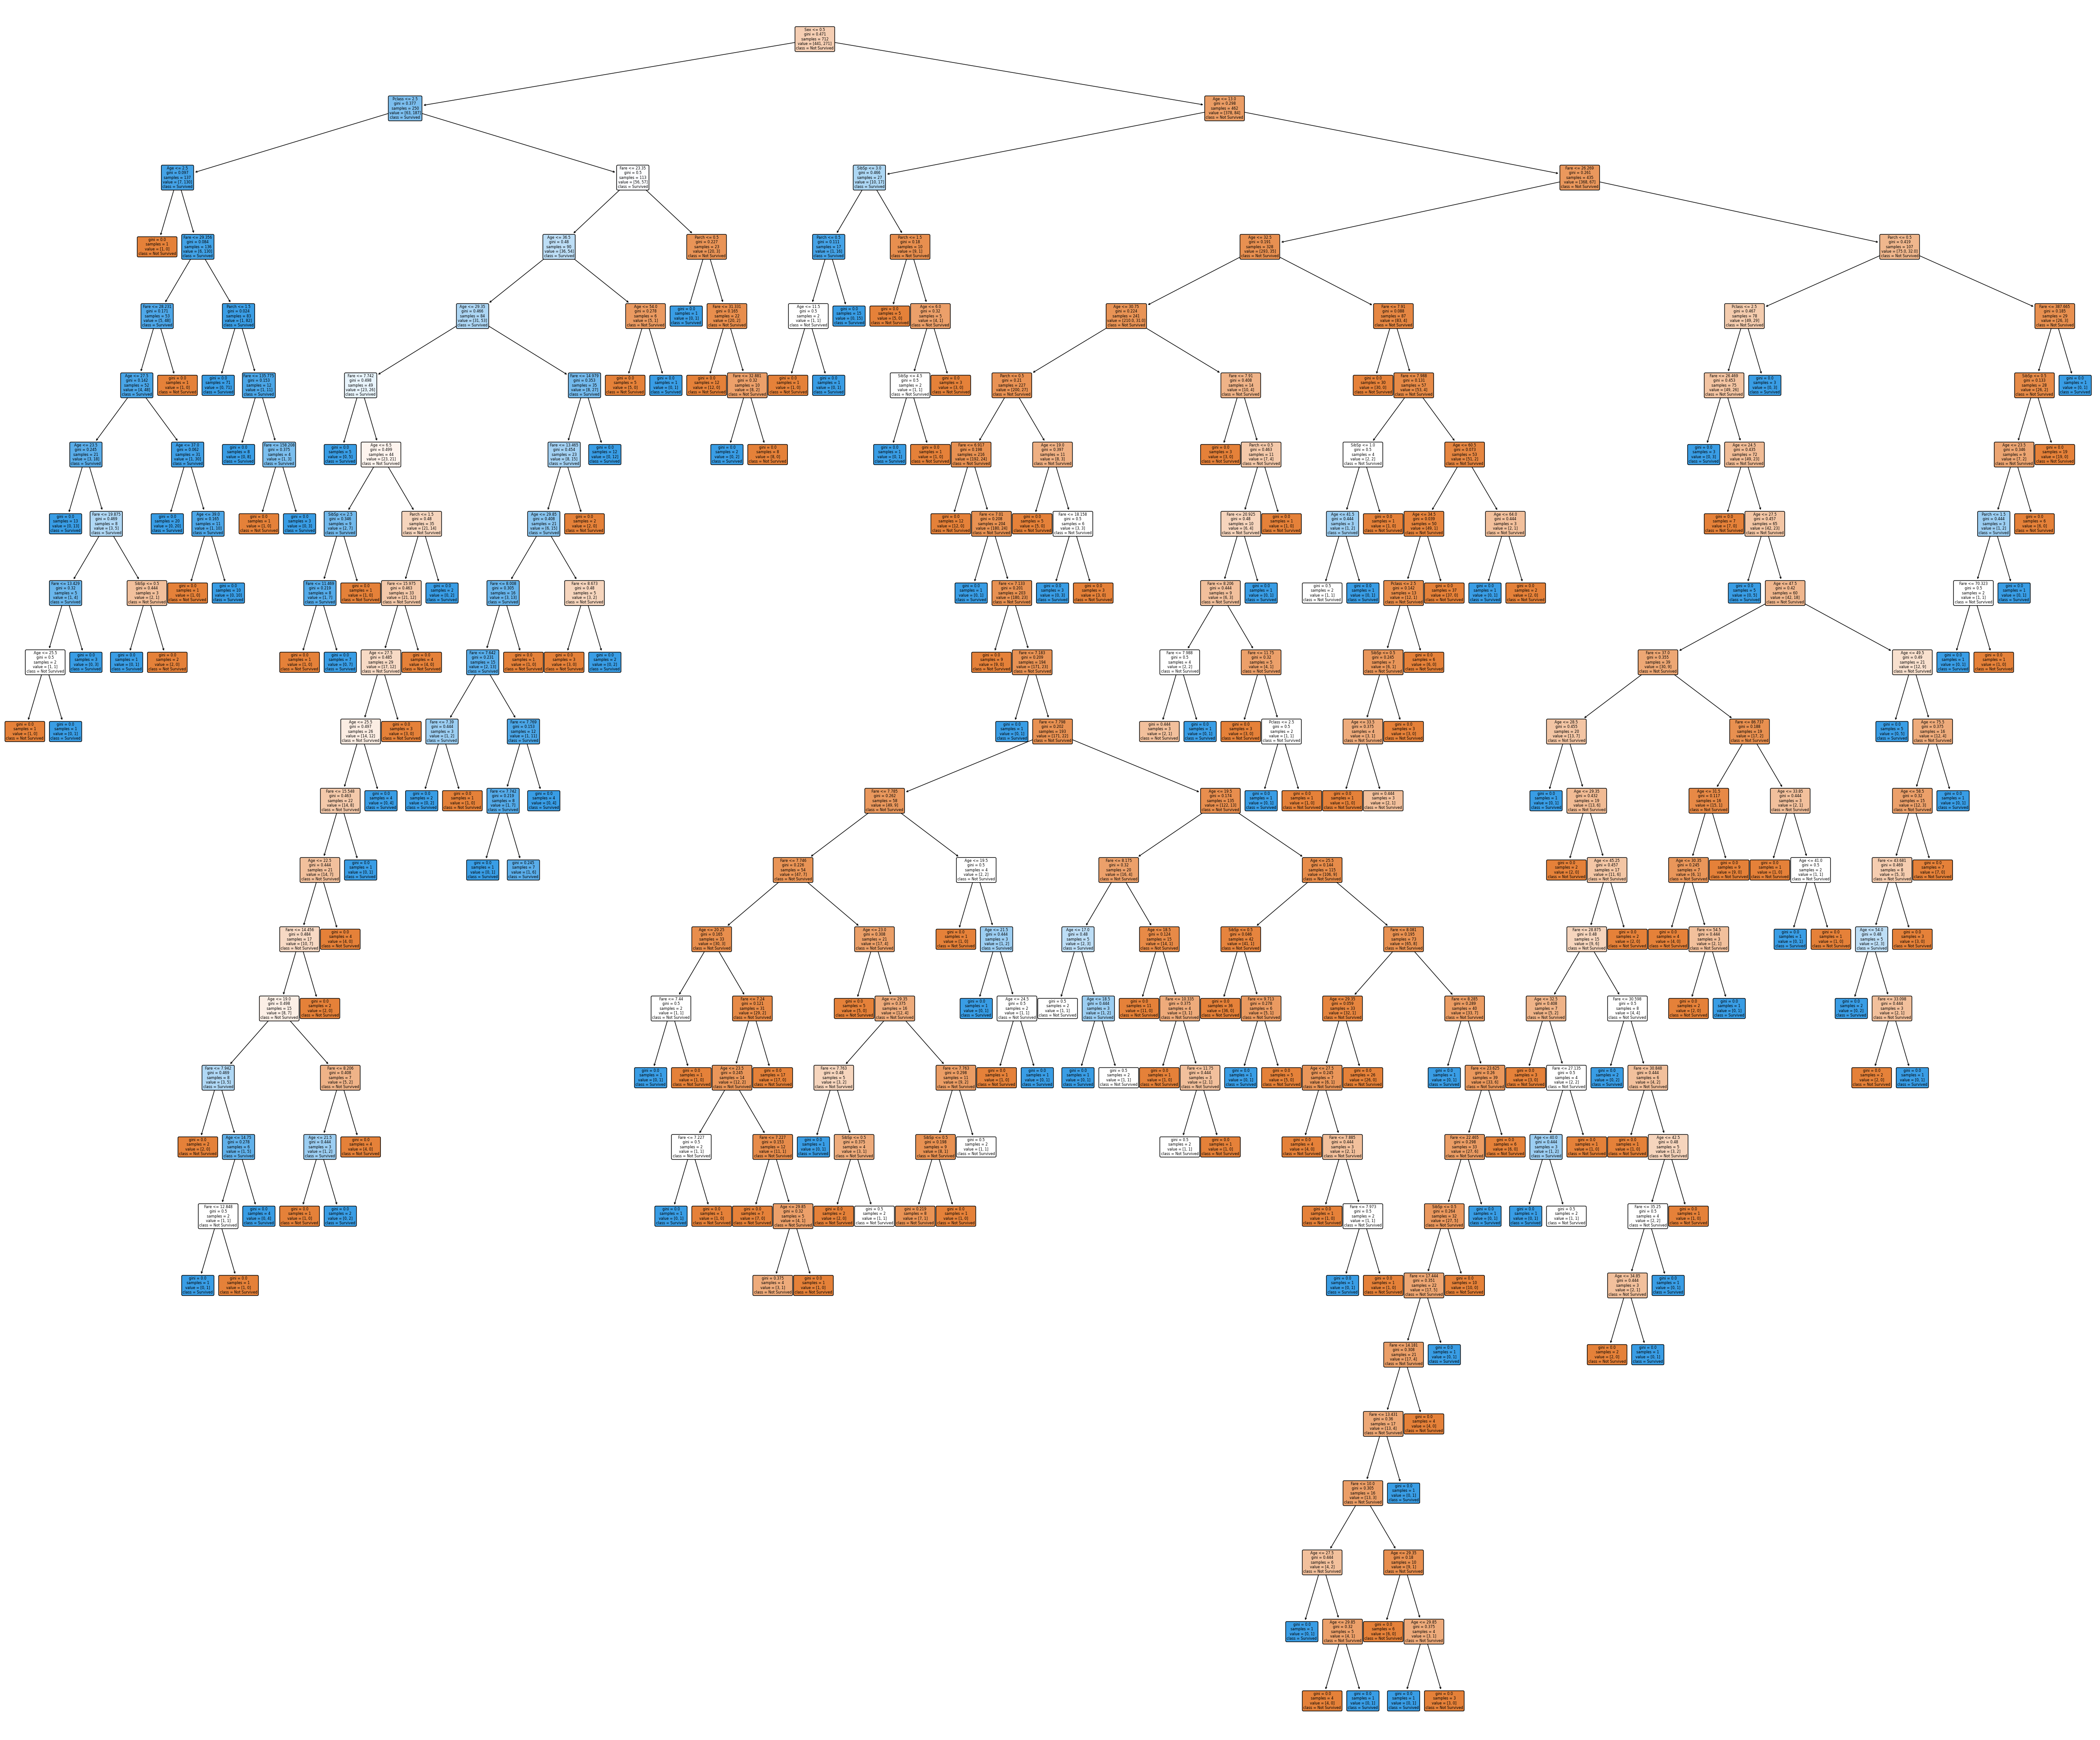

In [18]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Afficher l'arbre de décision
plt.figure(figsize=(60, 50)) 
plot_tree(model_dt, feature_names=X_train.columns, class_names=['Not Survived',
 'Survived'], filled=True, rounded=True)
plt.show()


L'arbre semble assez profond et complexe, avec de nombreuses branches et feuilles.

Une structure aussi complexe peut être un signe d'overfitting

In [19]:
# Prédictions sur l'ensemble d'entraînement
y_train_pred = model_dt.predict(X_train)

# Prédictions sur l'ensemble de test
y_test_pred = model_dt.predict(X_test)

Accuracy (Exactitude) : La proportion de prédictions correctes par rapport au nombre total de prédictions. Une accuracy élevée signifie généralement que le modèle a bien appris à classifier les données, mais ce n'est pas suffisant à lui seul pour évaluer la performance, surtout en cas de déséquilibre des classes.

In [20]:
# Calcul des métriques pour l'ensemble d'entraînement
from sklearn.metrics import accuracy_score


accuracy_train = accuracy_score(y_train, y_train_pred)
print("Métriques pour l'ensemble d'entraînement :")
print(f"Exactitude : {accuracy_train:.6f}")
print("\nMétriques pour l'ensemble de test :")
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Exactitude : {accuracy_test:.6f}")

Métriques pour l'ensemble d'entraînement :
Exactitude : 0.983146

Métriques pour l'ensemble de test :
Exactitude : 0.743017


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


Precision (Précision) : La proportion des vraies prédictions positives par rapport au nombre total de prédictions positives. Une précision élevée signifie que le modèle a peu de faux positifs.

In [22]:
# Calcul de la précision pour l'ensemble d'entraînement
precision_train = precision_score(y_train, y_train_pred)
print("\nMétriques pour l'ensemble d'entraînement :")
print(f"Précision : {precision_train:.6f}")

# Calcul de la précision pour l'ensemble de test
precision_test = precision_score(y_test, y_test_pred)
print("\nMétriques pour l'ensemble de test :")
print(f"Précision : {precision_test:.6f}")



Métriques pour l'ensemble d'entraînement :
Précision : 0.996169

Métriques pour l'ensemble de test :
Précision : 0.666667


Recall (Rappel) : La proportion des vrais positifs par rapport au nombre total de véritables positifs. Un rappel élevé indique que le modèle a bien identifié les échantillons positifs.

In [23]:
# Calcul du rappel pour l'ensemble d'entraînement
recall_train = recall_score(y_train, y_train_pred)
print("\nMétriques pour l'ensemble d'entraînement :")
print(f"Rappel : {recall_train:.6f}")

# Calcul du rappel pour l'ensemble de test
recall_test = recall_score(y_test, y_test_pred)
print("\nMétriques pour l'ensemble de test :")
print(f"Rappel : {recall_test:.6f}")


Métriques pour l'ensemble d'entraînement :
Rappel : 0.959410

Métriques pour l'ensemble de test :
Rappel : 0.704225


F1 Score : La moyenne harmonique de la précision et du rappel. C'est une bonne mesure de performance globale, surtout si les classes sont déséquilibrées.

In [24]:
# Calcul du score F1 pour l'ensemble d'entraînement
f1_train = f1_score(y_train, y_train_pred)
print("\nMétriques pour l'ensemble d'entraînement :")
print(f"Score F1 : {f1_train:.6f}")

# Calcul du score F1 pour l'ensemble de test
f1_test = f1_score(y_test, y_test_pred)
print("\nMétriques pour l'ensemble de test :")
print(f"Score F1 : {f1_test:.6f}")


Métriques pour l'ensemble d'entraînement :
Score F1 : 0.977444

Métriques pour l'ensemble de test :
Score F1 : 0.684932


# GridSearchcv

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Définir le modèle de base
model_dt = DecisionTreeClassifier()

# Définir la grille de paramètres à tester
param_grid = {
    'criterion': ['gini', 'entropy'],  # Critère de division
    'max_depth': [3, 4, 5],  # Profondeur maximale de l'arbre
    'min_samples_leaf': [1, 2, 5, 10],  # Nombre minimum d'échantillons requis pour être une feuille
    'max_leaf_nodes': [5, 10, 15],  # Nombre maximal de feuilles
    'splitter': ['best', 'random']  # Stratégie de division des noeuds
}

# Créer l'objet GridSearchCV
grid_search = GridSearchCV(estimator=model_dt, param_grid=param_grid,
                           cv=(5))

# Entraîner GridSearchCV sur l'ensemble d'entraînement
grid_search.fit(X_train, y_train)




GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5], 'max_leaf_nodes': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'splitter': ['best', 'random']})

In [26]:

# Afficher les meilleurs paramètres trouvés
best_params = grid_search.best_params_
print("Meilleurs paramètres trouvés :")
print(best_params)

Meilleurs paramètres trouvés :
{'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 15, 'min_samples_leaf': 5, 'splitter': 'best'}


In [27]:

# Afficher le meilleur modèle trouvé par GridSearchCV
best_model = grid_search.best_estimator_
print("\nModèle optimisé avec les meilleurs paramètres :")
print(best_model)



Modèle optimisé avec les meilleurs paramètres :
DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=15,
                       min_samples_leaf=5)


In [28]:

# Afficher la meilleure performance (score) obtenue
best_score = grid_search.best_score_
print("\nMeilleure performance (score) obtenue sur l'ensemble de validation croisée :")
print(f"Score : {best_score:.6f}")



Meilleure performance (score) obtenue sur l'ensemble de validation croisée :
Score : 0.832916


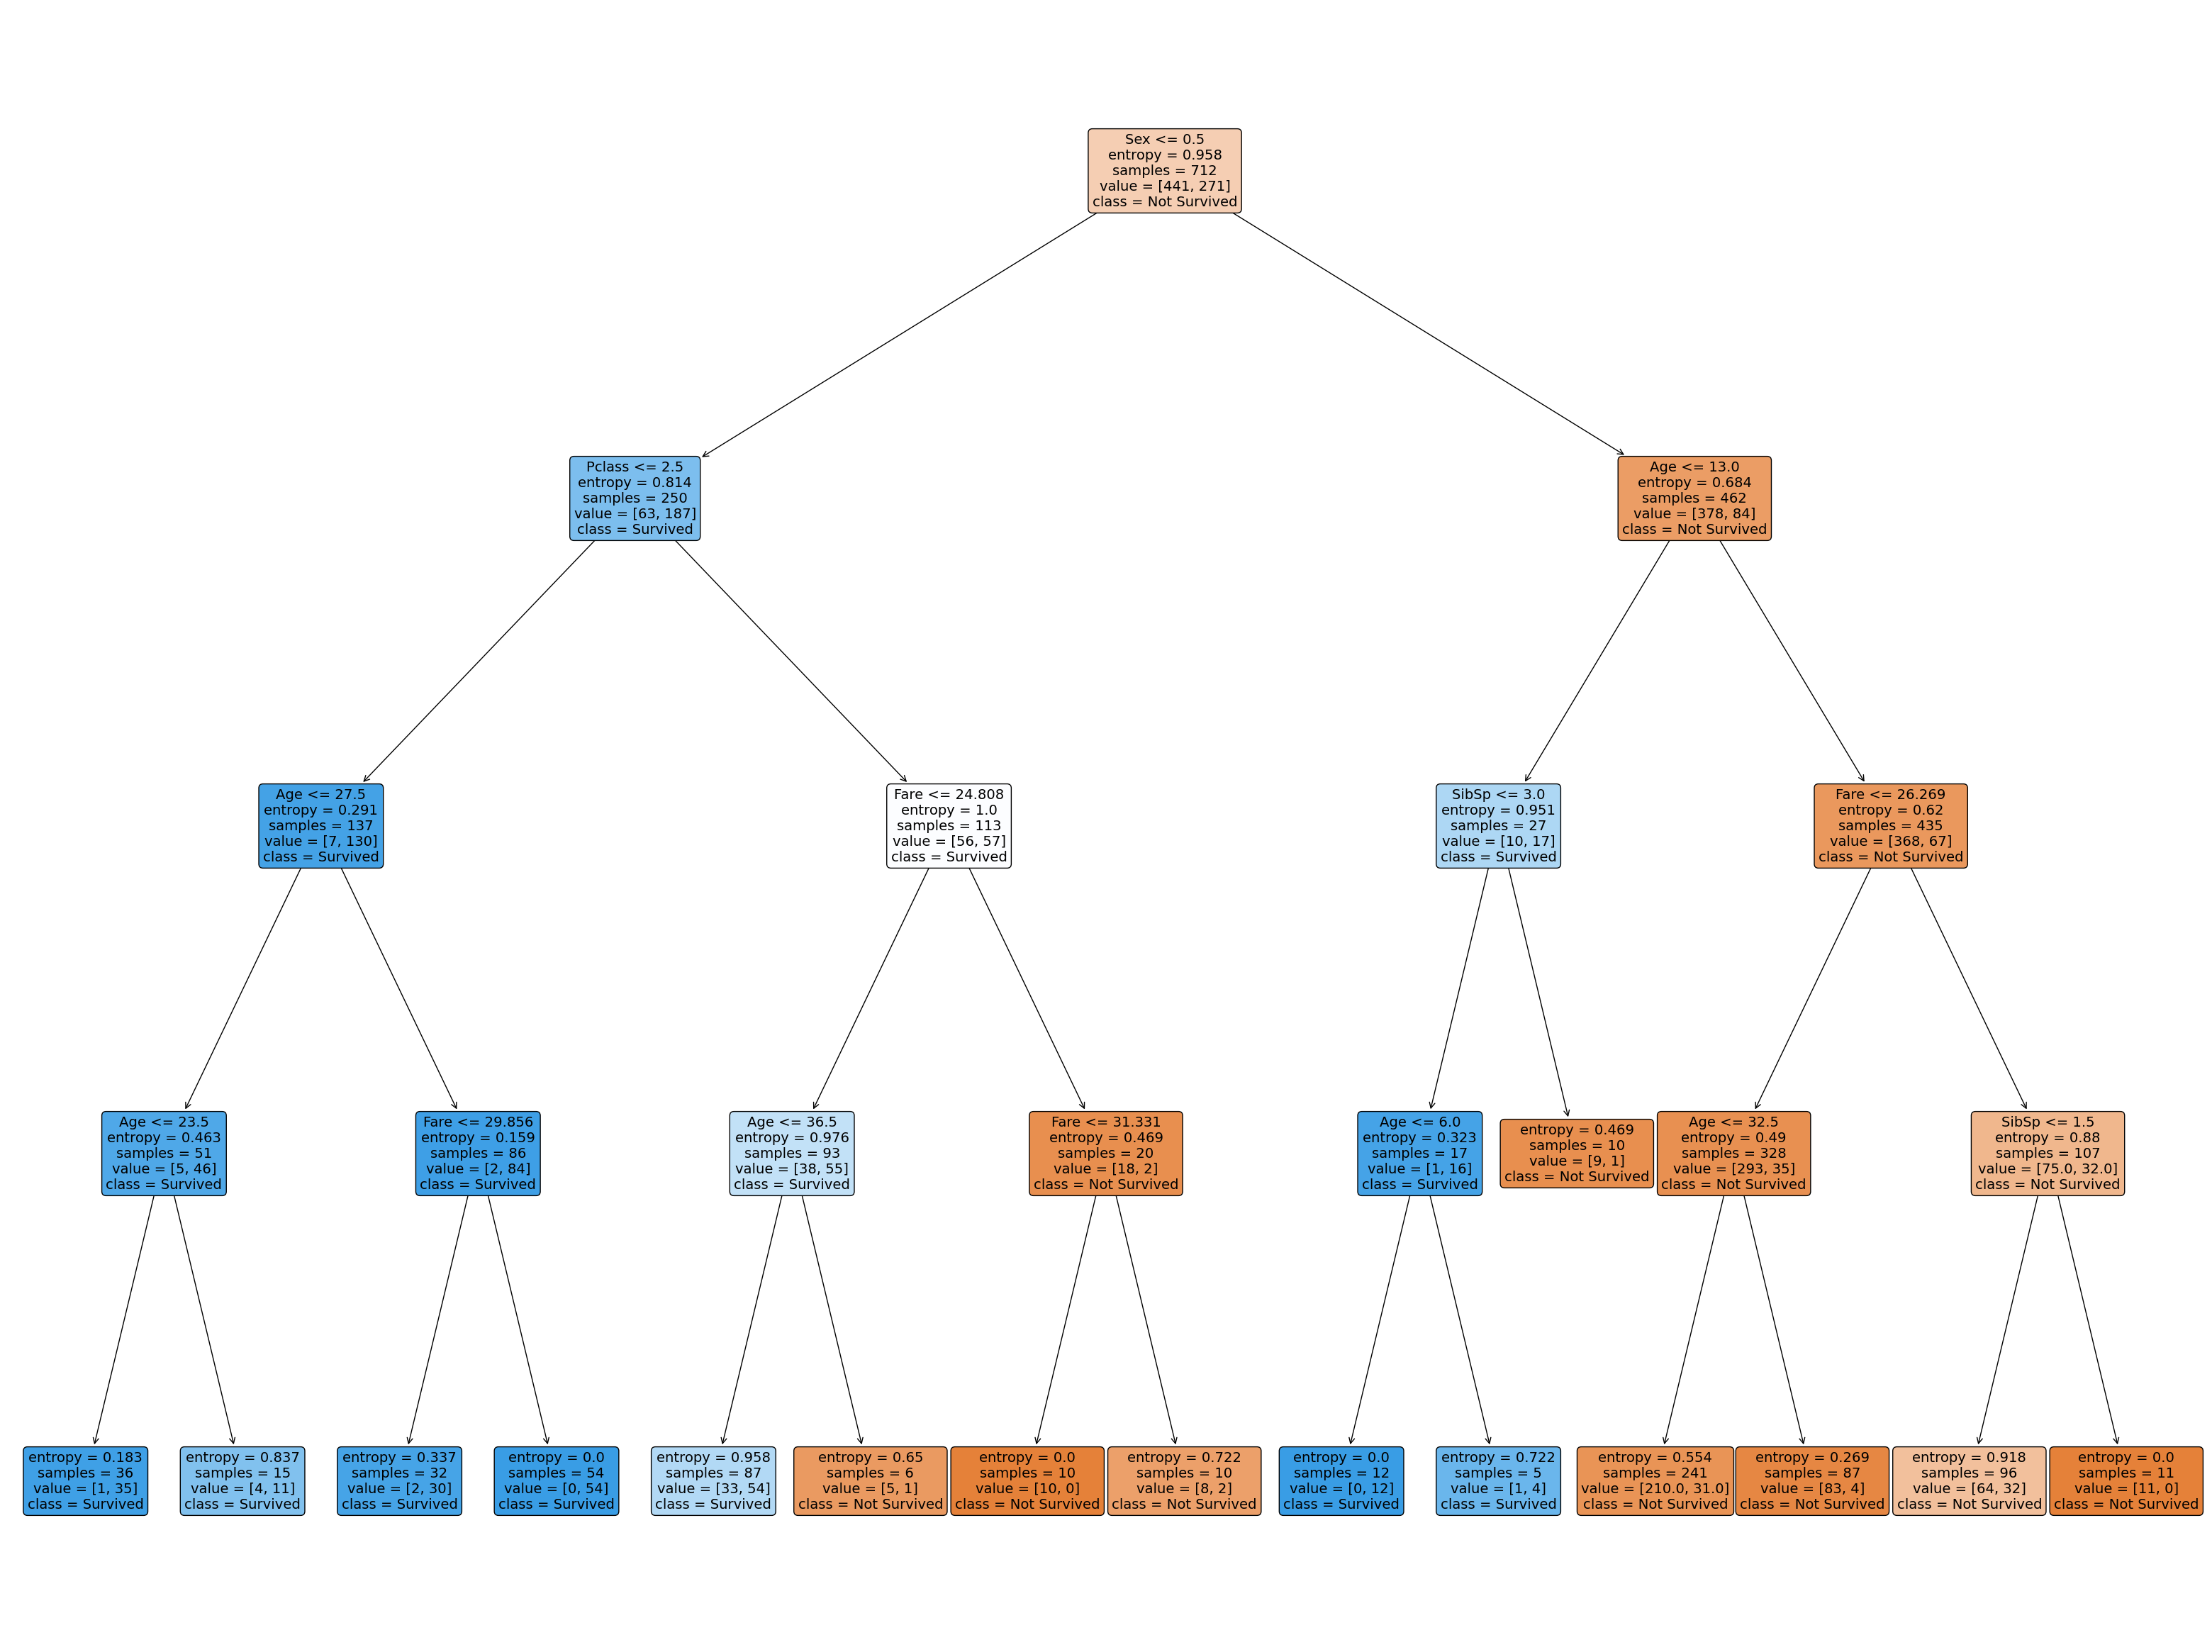

In [29]:


plt.figure(figsize=(40, 30))
plot_tree(best_model, feature_names=X_train.columns, class_names=['Not Survived', 'Survived'], filled=True, rounded=True)
plt.show()


In [30]:

# Prédictions sur l'ensemble d'entraînement
y_train_pred_optimized = best_model.predict(X_train)

# Prédictions sur l'ensemble de test
y_test_pred_optimized = best_model.predict(X_test)

# Affichage des métriques pour l'ensemble d'entraînement
print("Métriques pour l'ensemble d'entraînement :")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_train = accuracy_score(y_train, y_train_pred_optimized)
precision_train = precision_score(y_train, y_train_pred_optimized)
recall_train = recall_score(y_train, y_train_pred_optimized)
f1_train = f1_score(y_train, y_train_pred_optimized)

print(f"Exactitude : {accuracy_train:.6f}")
print(f"Précision : {precision_train:.6f}")
print(f"Rappel : {recall_train:.6f}")
print(f"Score F1 : {f1_train:.6f}")

# Affichage des métriques pour l'ensemble de test
print("\nMétriques pour l'ensemble de test :")
accuracy_test = accuracy_score(y_test, y_test_pred_optimized)
precision_test = precision_score(y_test, y_test_pred_optimized)
recall_test = recall_score(y_test, y_test_pred_optimized)
f1_test = f1_score(y_test, y_test_pred_optimized)

print(f"Exactitude : {accuracy_test:.6f}")
print(f"Précision : {precision_test:.6f}")
print(f"Rappel : {recall_test:.6f}")
print(f"Score F1 : {f1_test:.6f}")


Métriques pour l'ensemble d'entraînement :
Exactitude : 0.842697
Précision : 0.829876
Rappel : 0.738007
Score F1 : 0.781250

Métriques pour l'ensemble de test :
Exactitude : 0.787709
Précision : 0.746269
Rappel : 0.704225
Score F1 : 0.724638


In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Entraîner le modèle SVM
svm_model = SVC(kernel='linear')  # Vous pouvez choisir d'autres noyaux comme 'rbf' ou 'poly'
svm_model.fit(X_train, y_train)

# Prédictions
y_pred = svm_model.predict(X_test)

# Calculer les métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' pour tenir compte des classes déséquilibrées
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.8324022346368715
Precision: 0.8312188678206788
Recall: 0.8324022346368715
F1 Score: 0.8308179436127229
